### Implémenter :

- Une classe "fonction d'activation" qui calcule une fonction d'activation et sa dérivée au moins pour la sigmoïde.
- Un réseau de neurones (reprendre le TP2), de préférence sous forme de classe
- La backpropagation (+ descente de gradient) pour le réseau. 

Pour vous aider, voici un premier canevas

### Implémenter :

- Une classe "fonction d'activation" qui calcule une fonction d'activation et sa dérivée au moins pour la sigmoïde.
- Un réseau de neurones (reprendre le TP2), de préférence sous forme de classe
- La backpropagation (+ descente de gradient) pour le réseau. 

Pour vous aider, voici un premier canevas

In [1]:
import numpy as np

class activation:
    def __init__(self, function, derivative):
        self.function = function
        self.derivative = derivative

sigmoid = activation(lambda x : 1/(1+np.exp(-x)), lambda x : np.exp(-x)/((1+np.exp(-x))**2))
identity = activation(lambda x : x, lambda x : 1)

class layer:
    def __init__(self, size_in, size_out, activation_function):
        self.entry = np.zeros([size_in])
        self.weights = np.random.normal(size=[size_out, size_in])
        self.gradient_weights = np.zeros([size_out, size_in])
        self.bias = np.random.normal(size=[size_out])
        self.gradient_bias = np.zeros([size_out])
        self.activation = activation_function
        
    def output(self):
        return self.activation.function(self.weights @ self.entry + self.bias)
    
    def derivate(self):
        return self.activation.derivative(self.weights @ self.entry + self.bias)
    
    def descend(self, step_length):
        self.weights -= step_length * self.gradient_weights
        self.bias -= step_length * self.gradient_bias
        
        # Reset gradients
        self.gradient_weights = np.zeros([self.weights.shape[0], self.weights.shape[1]])
        self.gradient_bias = np.zeros([self.bias.shape[0]])

class network:
    def __init__(self):
        self.layers = []
        
    def add_layer(self,size_in, size_out, activation_function):
        new_layer = layer(size_in, size_out, activation_function)
        self.layers.append(new_layer)
        
    def run(self,x):
        output = np.copy(x) #Par défaut, numpy ne fait pas de copies lors des attributions
        for layer in self.layers:
            layer.entry = np.copy(output)
            output = np.copy(layer.output())
        return output
    
    def fit(self,training_data, training_labels, nb_steps, step_length):
        n = training_data.shape[0]
        for i in range(nb_steps):
            loss = 0
            for j in range(n):
                output = self.run(training_data[j,:].transpose())
                H = -2 * (training_labels[j,:] - output)
                loss += np.sum(np.pow(training_labels[j,:] - output, 2))
                
                for layer in reversed(self.layers):
                    temp = layer.derivate()
                    layer.gradient_weights += np.outer(H * temp, layer.entry)
                    layer.gradient_bias += H * temp
                    H = layer.weights.transpose() @ (H * temp)
                    
            
            for layer in self.layers:
                layer.descend(step_length)
            
            if(i%100 == 0) : print(loss)

### Test : régression linéaire

Régresser Y par rapport à X dans un cas linéaire avec un réseau à une seule couche. (On devrait obtenir une droite de régression linéaire)

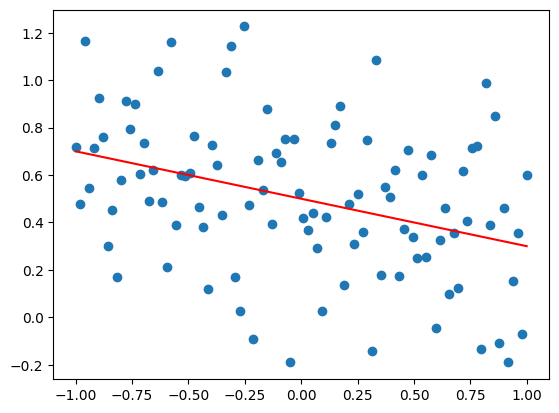

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

X = np.linspace(-1,1,n)
X.resize([n,1])
fX = -0.2*X + 0.5

eps = np.random.multivariate_normal(mean = [0], cov = [[0.1]], size = [n])

Y = fX + eps 

plt.scatter(X,Y)
plt.plot(X, fX, 'red')

279.9582385346936
244.19634855856705
213.4137295640069
186.83516723654355
163.83083958982286
143.88238875203731
126.55840064789683
111.49641575781956
98.38951441998748
86.97614045759696
77.03224576872034
68.36512197313242
60.808477587099574
54.21845023412942
48.470333064350484
43.45585626125659
39.08090728001824
35.26360335530527
31.932650927998917
29.02594172946697
26.48934619619319
24.27567293271258
22.343768958779734
20.65774005654582
19.186274080096744
17.90205288314546
16.78124075641223
15.803039081975118
14.949298405784813
14.204180372532488
13.553863011135387
12.986283743028386
12.490915238609052
12.058569892257694
11.681229241139496
11.351895131693652
11.064459851820502
10.813592805727913
10.594641620025127
10.403545840523671
10.236761614871423
10.091195961332547
9.964149402774018
9.85326590070366
9.756489160019392
9.67202449356532
9.598305538891356
9.533965209726691
9.477810343297037
9.428799573211863
9.386024017504786
9.348690423642106
9.316106457895875
9.28766786625572
9.262

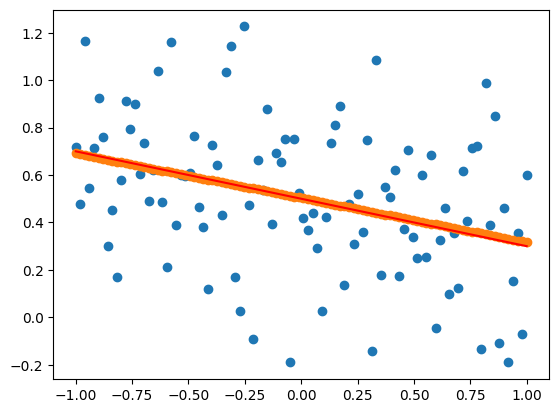

In [3]:
NN = network()
NN.add_layer(1,1,identity)
NN.fit(X,Y,10000, 1e-5) # fX étant un réseau particulier, on devrait pouvoir fitter (quasi) parfaitement
hatY = np.copy(Y)
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')
plt.show()

1355.5052856129366
798.4048846052185
521.7617124366053
367.927774644653
273.0737242556558
209.40764927093778
163.9446359650372
130.11615852252135
104.2888893679183
84.26106164594738
68.58510361556012
56.24652647036188
46.5015966884224
38.78870843272796
32.675801983786435
27.82661399960295
23.97754996288934
20.921042400068
18.49316522865024
16.564208447296643
15.031401855379716
13.813245535076009
12.845065490710933
12.075515626712548
11.463816974903647
10.977574587519374
10.59104884336625
10.283785203442173
10.039527281036706
9.845354166668319
9.690995451860832
9.568287175385795
9.47073959553711
9.393193741053038
9.331548468440785
9.282543529355465
9.243587141299294
9.212618924319248
9.188000945685436
9.168431105978417
9.152874284182403
9.14050759990276
9.13067689802737
9.122862154886969
9.116649976828471
9.111711737157218
9.107786195518878
9.104665680770777
9.102185106782132
9.100213240369085
9.098645759634065
9.097399735635442
9.096409245565859
9.095621885444263
9.094995997888827
9.09

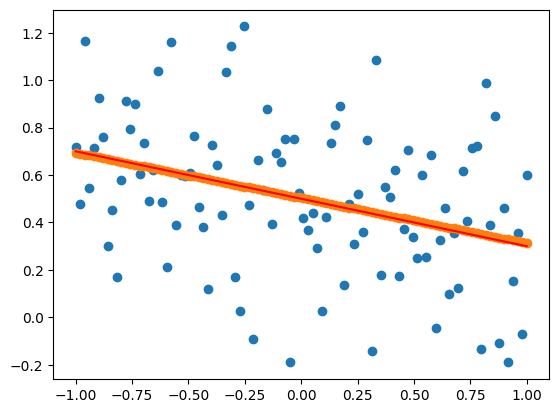

In [4]:
#Testons un réseau à deux couches

NN = network()
NN.add_layer(1,10,identity)
NN.add_layer(10,1,identity)
NN.fit(X,Y,10000,1e-6) 
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')

136.29344127863016
9.11755468135393
9.116133421413421
9.115530950323038
9.114958661158997
9.114414432428362
9.113896334226034
9.113402597827129
9.112931599816248
9.112481848018437
[[0.66460314]
 [0.66331532]
 [0.66194031]
 [0.66047815]
 [0.65892891]
 [0.65729277]
 [0.65556992]
 [0.65376064]
 [0.65186526]
 [0.64988418]
 [0.64781785]
 [0.64566681]
 [0.64343163]
 [0.64111298]
 [0.63871158]
 [0.6362282 ]
 [0.63366371]
 [0.63101902]
 [0.62829512]
 [0.62549306]
 [0.62261397]
 [0.61965901]
 [0.61662946]
 [0.61352661]
 [0.61035185]
 [0.60710663]
 [0.60379245]
 [0.60041087]
 [0.59696352]
 [0.5934521 ]
 [0.58987833]
 [0.58624402]
 [0.58255103]
 [0.57880126]
 [0.57499665]
 [0.57113923]
 [0.56723103]
 [0.56327416]
 [0.55927073]
 [0.55522294]
 [0.55113298]
 [0.54700311]
 [0.54283559]
 [0.53863272]
 [0.53439685]
 [0.53013031]
 [0.52583547]
 [0.52151473]
 [0.51717048]
 [0.51280512]
 [0.50842108]
 [0.50402077]
 [0.49960662]
 [0.49518104]
 [0.49074644]
 [0.48630524]
 [0.48185982]
 [0.47741257]
 [0.4729

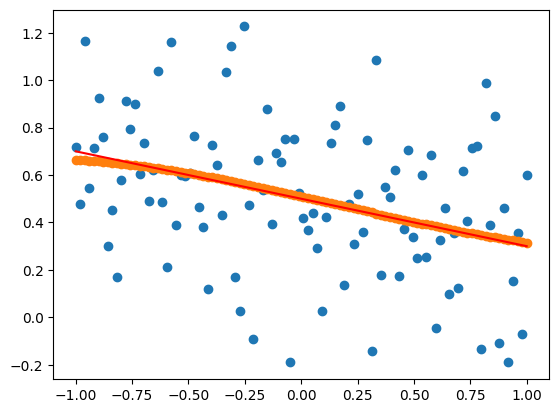

In [5]:
#Testons la fonction d'activation sigmoïde

NN = network()
NN.add_layer(1,10,sigmoid)
NN.add_layer(10,1,identity)
NN.fit(X,Y,1000,1e-3) 
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
print(hatY)
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')

### Test : régression polynomiale

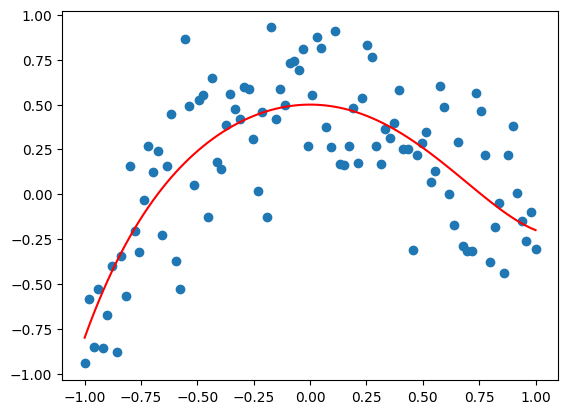

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

X = np.linspace(-1,1,n)
X.resize([n,1])
fX = 0.3*X**5 - X**2 + 0.5

eps = np.random.multivariate_normal(mean = [0], cov = [[0.1]], size = [n])

Y = fX + eps 

plt.scatter(X,Y)
plt.plot(X, fX, 'red')

88.87457057712416
88.86986829332454
88.86454630551596
88.85847358895404
88.85147941995739
88.8433371243803
88.83373913943507
88.82225744825517
88.80827830641961
88.79088943572746
88.76867379932749
88.73930545728983
88.6986843618088
88.63885489328759
88.54211565985287
88.3597161651379
87.89323537951188
84.70807355689671
24.026022223767836
22.404465097245254
22.176907412037995
22.076951682657654
22.01114014583811
21.95604082629707
21.90151798373297
21.840464737659488
21.765120484337242
21.66402223399482
21.517071675816084
21.285521643967513
20.894483086130602
20.23851992346785
19.335970936244586
18.410702653355173
17.603584354096572
16.933640896986862
16.380221047612
15.918609514410607
15.528689790268473
15.195506129281645
14.908117182847697
14.658409761036296
14.44021187041412
14.248693230104035
14.07997401320495
13.930870569575477
13.798727753300454
13.681305188497292
13.576697122091938
13.483273463082893
13.399634553590573
13.324575215037054
13.257055389352232
13.19617572627627
13.141

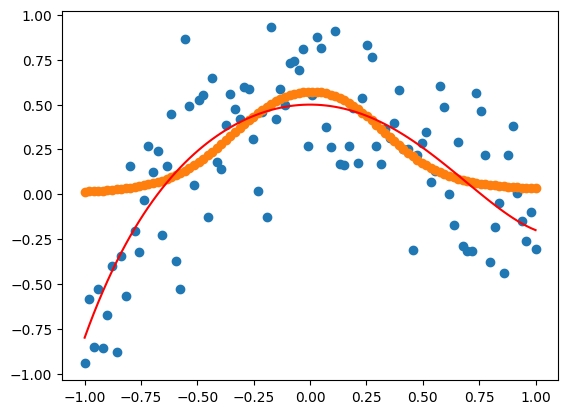

In [11]:
NN = network()
NN.add_layer(1,100,sigmoid)
NN.add_layer(100,100,sigmoid)
NN.add_layer(100,1,sigmoid)

NN.fit(X,Y, 10000, 1e-4)

n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')

In [ ]:
NN = network()
NN.add_layer(28,100,identity)
NN.add_layer(100,100,identity)
NN.add_layer(100,10,identity)

NN.fit(X,Y, 10000, 1e-4)

n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')